<a href="https://colab.research.google.com/github/heroideallstar/data_alura/blob/main/desafios_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio 1
1) Importe o arquivo alunos.csv e armazene seu conteúdo em um DataFrame Pandas.

2) Visualize as primeiras 7 linhas do DataFrame e as 5 últimas.

3) Confira a quantidade de linhas e colunas desse DataFrame.

4) Explore as colunas do DataFrame e analise os tipos dos dados presentes em cada coluna.

Extra: Calcule algumas estatísticas descritivas básicas dos dados do DataFrame (média, desvio padrão, etc). Dica: pesquise pelo método describe.

In [3]:
import pandas as pd
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
dados = pd.read_csv(url)
dados.head(7)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True


In [4]:
dados.tail(5)

,Nome,Idade,Notas,Aprovado
13,Mirla,25,9.0,True
14,Paulo,37,NaN,False
15,Mylena,29,7.0,True
16,Lucas,33,NaN,False
17,Nadia,34,8.0,True


In [5]:
dados.shape

(18, 4)

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nome      18 non-null     object 
 1   Idade     18 non-null     int64  
 2   Notas     12 non-null     float64
 3   Aprovado  18 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 578.0+ bytes


In [10]:
dados['Notas'].describe()

count    12.000000
mean      6.800000
std       2.204953
min       2.500000
25%       5.450000
50%       7.000000
75%       8.250000
max      10.000000
Name: Notas, dtype: float64

In [11]:
dados['Idade'].describe()

count    18.000000
mean     25.500000
std       6.070662
min      18.000000
25%      21.000000
50%      24.500000
75%      28.750000
max      37.000000
Name: Idade, dtype: float64

#Desafio 2

1) Calcular a média de quartos por apartamento;

2) Conferir quantos bairros únicos existem na nossa base de dados;

3) Analisar quais bairros possuem a média de valor de aluguel mais elevadas;

4) Criar um gráfico de barras horizontais que apresente os 5 bairros com as médias de valores de aluguel mais elevadas.

In [24]:
url1 = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados2 = pd.read_csv(url1, sep=';')
dados2.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [27]:
imoveis_comerciais = ['Conjunto Comercial/Sala',
                      'Prédio Inteiro', 'Loja/Salão',
                      'Galpão/Depósito/Armazém',
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

In [30]:
df = dados2.query('@imoveis_comerciais not in Tipo')
df = df.query('Tipo == "Apartamento"')
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


In [31]:
df.Quartos.mean()

2.481568707761622

In [32]:
len(df['Bairro'].unique())

149

In [33]:
df['Bairro'].nunique()

149

In [34]:
df.groupby('Bairro')[['Valor']].mean().sort_values('Valor', ascending=False)

,Valor
Bairro,
Joá,15500.000000
Arpoador,12429.769231
Cidade Jardim,12000.000000
Ipanema,9487.205317
Botafogo,9369.207116
...,...
Inhoaíba,650.000000
Cosmos,610.000000
Santa Cruz,590.000000


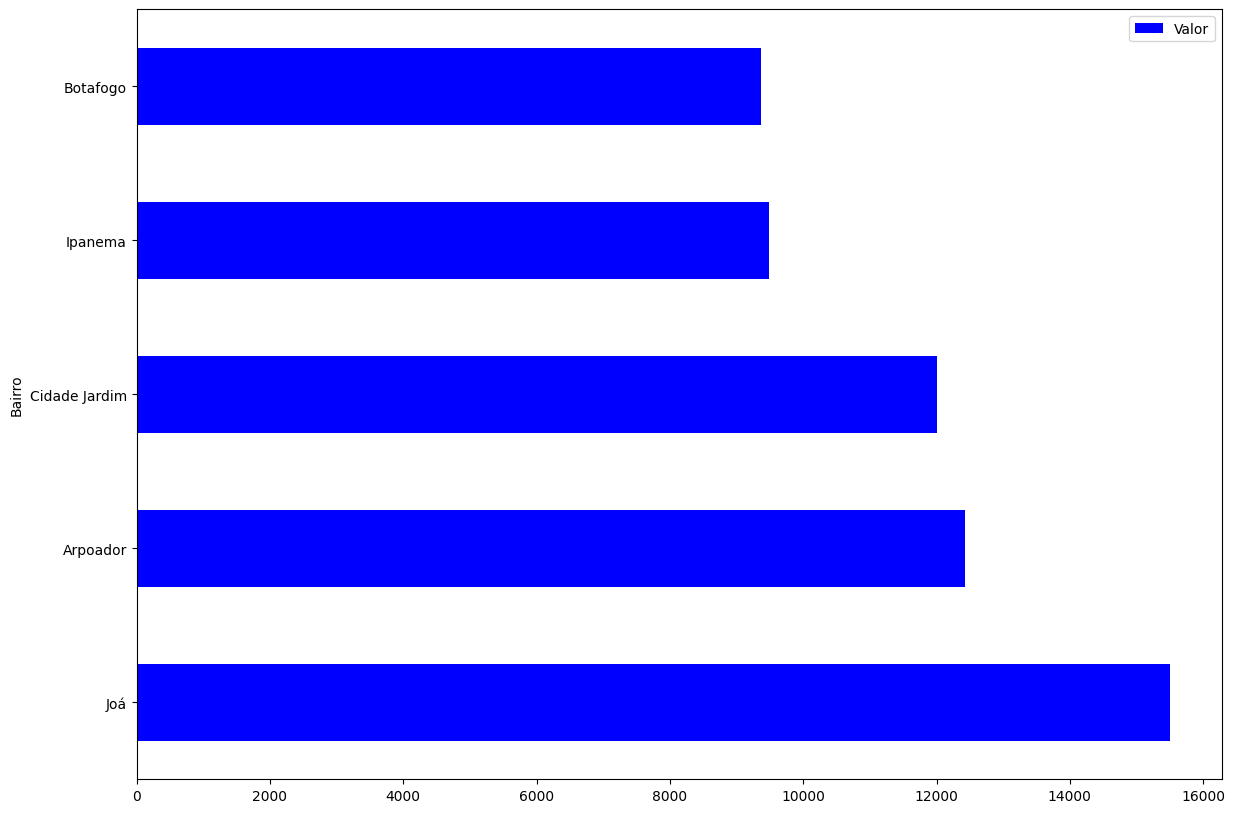

In [36]:
df_bairros = df.groupby('Bairro')[['Valor']].mean().sort_values('Valor', ascending=False).head()
df_bairros.plot(kind='barh', figsize=(14,10), color='blue');

#Desafio 3
1) Verifique se a base de dados possui dados nulos e, caso tenha, realize o tratamento desses dados nulos da forma que achar mais coerente com a situação.

2) Os alunos "Alice" e "Carlos", não fazem mais parte da turma. Sendo assim, remova-os da base de dados.

3) Aplique um filtro que selecione apenas os alunos que foram aprovados.

4) Salve o DataFrame que possui apenas os alunos aprovados em um arquivo csv chamado "alunos_aprovados.csv".

Extra: Ao conferir as notas dos alunos aprovados, notamos que algumas notas estavam incorretas. As alunas que tiraram nota 7.0, na verdade, tinham um ponto extra que não foi contabilizado. Sendo assim, substitua as notas 7.0 da base de dados por 8.0. Dica: pesquise pelo método replace.

In [37]:
dados.isnull().sum()

Nome        0
Idade       0
Notas       6
Aprovado    0
dtype: int64

In [38]:
dados = dados.fillna(0)
dados.isnull().sum()

Nome        0
Idade       0
Notas       0
Aprovado    0
dtype: int64

In [42]:
alunos_a_remover = dados.query('Nome == "Alice" | Nome == "Carlos"').index
dados.drop(alunos_a_remover, axis = 0, inplace = True)

In [49]:
aprv = dados['Aprovado'] == True
alunos_aprovados = dados[aprv]
alunos_aprovados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,7.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,7.0,True
17,Nadia,34,8.0,True


In [50]:
alunos_aprovados.to_csv('alunos_aprovados.csv', index=False)

In [51]:
alunos_aprovados.replace(7.0, 8.0)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,8.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,8.0,True
17,Nadia,34,8.0,True


In [52]:
alunos_aprovados = alunos_aprovados.replace(7.0, 8.0)
alunos_aprovados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,8.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,8.0,True
17,Nadia,34,8.0,True


#Desafio 4
1) Os alunos participaram de uma atividade extracurricular e ganharam pontos extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles. Com base nisso, crie uma coluna chamada "Pontos_extras" que contenha os pontos extras de cada aluno, ou seja, 40% da nota atual deles.

2) Crie mais uma coluna, chamada "Notas_finais" que possua as notas de cada aluno somada com os pontos extras.

3) Como houve uma pontuação extra, alguns alunos que não tinham sido aprovados antes podem ter sido aprovados agora. Com base nisso, crie uma coluna chamada "Aprovado_final" com os seguintes valores:


*   True: caso o aluno esteja aprovado (nota final deve ser maior ou igual a 6);
*   False: caso o aluno esteja reprovado (nota final deve ser menor que 6).



4) Faça uma seleção e verifique quais alunos não tinham sido aprovados anteriormente, mas foram aprovados após a soma dos pontos extras.

In [53]:
dados['Pontos_extras'] = dados.Notas.apply(lambda x: x*0.4)

In [54]:
dados['Notas_final'] = dados.Notas + dados.Pontos_extras

In [55]:
dados['Aprovados_final'] = dados['Notas_final'].apply(lambda x: True if x >= 6 else False)
dados

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_final,Aprovados_final
0,Ary,20,7.5,True,3.0,10.5,True
1,Ana,18,0.0,False,0.0,0.0,False
2,Cátia,27,2.5,False,1.0,3.5,False
3,Denis,18,5.0,False,2.0,7.0,True
4,Beto,21,10.0,True,4.0,14.0,True
5,Bruna,23,0.0,False,0.0,0.0,False
6,Dara,21,7.0,True,2.8,9.8,True
9,Vitor,28,0.0,False,0.0,0.0,False
10,Daniel,21,0.0,False,0.0,0.0,False
11,Igor,24,4.5,False,1.8,6.3,True


In [56]:
dados.query('Aprovado == False & Aprovados_final == True')

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_final,Aprovados_final
3,Denis,18,5.0,False,2.0,7.0,True
11,Igor,24,4.5,False,1.8,6.3,True
